In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = [12,5]

In [2]:
# read data
data = pd.read_csv('../input/studentscores/student-scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# understand data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

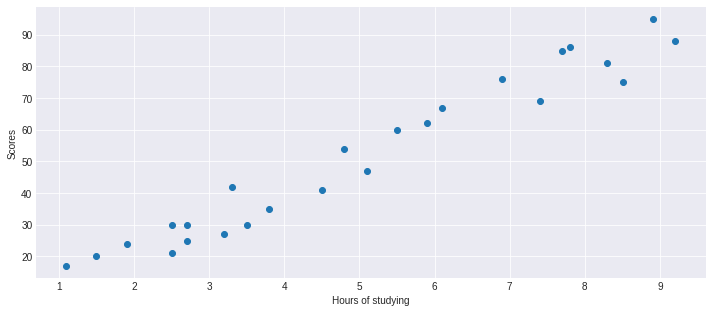

In [4]:
# visualize data
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours of studying')
plt.ylabel('Scores')

# Using numpy and custom gradient descent

In [5]:
param = np.array([np.random.random(), np.random.random()], dtype=float)   # array to store parameters a0, a1 in y = a0 + a1.x
parameters = []
learning_rate = 0.0001
threshold = 0.00001   # threshold for error
x, y = np.array(data['Hours']), np.array(data['Scores'])
x = np.concatenate((x, np.ones(len(x))), axis = 0).reshape(2, len(x))
iterations = 0

while True:
    if iterations%100 == 0:
        parameters.append([param[0],param[1]])
    yd = np.dot(param.T, x)   # predicted y
    delta = np.subtract(y, yd).mean()   # error
    if delta <= threshold:
        break;
    delta_m = -2*np.multiply(np.subtract(y, yd),x[0]).mean()
    delta_c = -2*np.subtract(y, yd).mean()
    param[0] = param[0] - delta_m*learning_rate   # update parameters
    param[1] = param[1] - delta_c*learning_rate   # update parameters
    iterations += 1

print('Parameters: {}, calculated after {} itarations'.format(param,iterations))

Parameters: [9.77581184 2.48362105], calculated after 228035 itarations


Predicted Score with 9.25 hrs of studying: 92.90988058813898


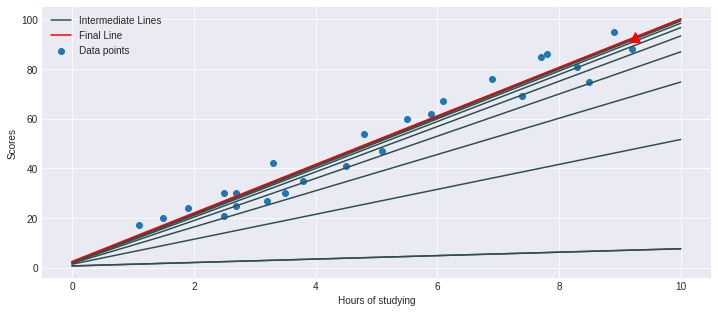

In [6]:
# plot lines for visualization

plt.figure(figsize=(12, 5))
plt.xlabel('Hours of studying')
plt.ylabel('Scores')

limit = min(int(iterations*0.01), 10)
plt.plot(np.arange(0,11), np.arange(0,11)*parameters[0][0] + parameters[0][1], 'darkslategray', label='Intermediate Lines')
for par in parameters[0:limit]:
    plt.plot(np.arange(0,11), np.arange(0,11)*par[0] + par[1], 'darkslategray')

plt.plot(np.arange(0,11), np.arange(0,11)*param[0] + param[1], 'r', label='Final Line')
plt.scatter(x[0], y, label='Data points')

predict_for = 9.25
plt.plot(predict_for, param[0]*predict_for + param[1], 'red', marker='^', markersize=10)
print('Predicted Score with {} hrs of studying: {}'.format(predict_for, param[0]*predict_for + param[1]))

plt.legend()

# Using sklearn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()
lr.fit(np.array(data['Hours']).reshape(-1, 1), data['Scores'])
print('Parameters: {}, {}'.format(lr.coef_[0], lr.intercept_))

predict_x = 9.25
print('Predicted Score with {} hrs of studying: {}'.format(predict_x, lr.predict(np.array(predict_x).reshape(-1,1))[0]))

Parameters: 9.775803390787472, 2.483673405373196
Predicted Score with 9.25 hrs of studying: 92.90985477015731
